KeyboardInterrupt: 

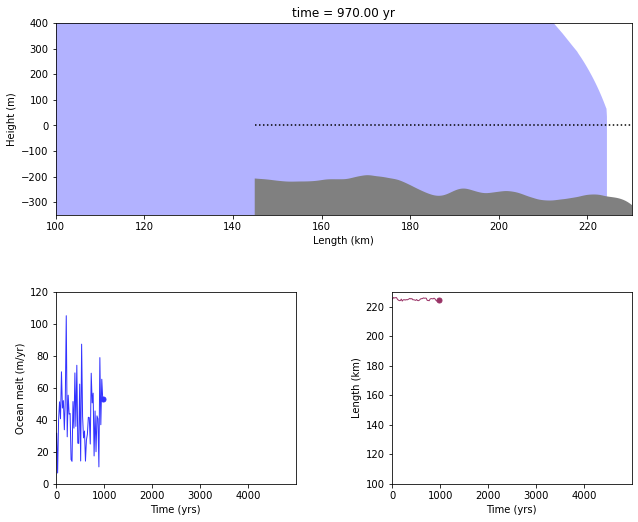

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import imageio
from pathlib import Path
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable



plt.rcParams.update({'font.size': 15})

%matplotlib inline


def create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        
def get_number(item):
    # Extract numeric part using regular expression
    match = re.search(r'\d+', item)
    return int(match.group()) if match else float('inf')
        
#types = ['bumpy_ocnnoise/bumpy_ocnnoise_50pct','bumpy_ocnsq/bumpy_ocnsq_50pct','bumpy_ocnstep/bumpy_ocnstep_100pct','bumpy_ocnstep/bumpy_ocnstep_75pct','bumpy_ocnstep/bumpy_ocnstep_50pct']
#types = ['bumpy_ocnsq/bumpy_ocnsq_50pct','bumpy_ocnstep/bumpy_ocnstep_75pct']

#no bedsteps/bumpy_ocnsteps_100pct
types = ['bumpy_ocnnoise/bumpy_ocnnoise_50pct']      
for typ in types:

    run = 'tests/'
    img_path = 'plots/new_tests/'


    #set directories
    #imgs
    img_path_base = 'plots/new_tests/'
    img_path = os.path.join(img_path_base,typ)


    #gif
    gif_path_base = 'gifs/test/'
    gif_path = os.path.join(gif_path_base,typ)

    datadir = os.path.join(run,typ)

    # Load data
    h = np.loadtxt(datadir + '_h.csv',delimiter=',')
    h=h[1::2]

    gl = np.loadtxt(datadir + '_gl.csv',delimiter=',')
    gl = gl[1::2]

    base = np.loadtxt(datadir + '_base.csv',delimiter=',')
    base=base[1::2]

    hgrid = np.loadtxt(datadir + '_hgrid.csv',delimiter=',')


    bedx = np.loadtxt(datadir + '_bedx.csv',delimiter=',')
    bedx = bedx[1::2]

    bedz = np.loadtxt(datadir + '_bedz.csv',delimiter=',')
    bedz = bedz[1::2]

    oceanmelt = np.loadtxt(datadir + '_oceanmelt.csv',delimiter=',')
    oceanmelt = oceanmelt[1::2]

    accum = np.loadtxt(datadir + '_accum.csv',delimiter=',')
    accum = accum[1::2]

    time = np.loadtxt(datadir + '_time.csv',delimiter=',')
    time = time[1::2]

    # Plot limits
    xlimx = [100, 230]
    ylimx = [-350, 400]
    xlimt = [-10, time[-1]]


    for t in range(len(time)):
        fig = plt.figure(figsize=(10,8))
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)


        gs = fig.add_gridspec(2, 2)

        f_ax1 = fig.add_subplot(gs[0, :])
        f_ax2 = fig.add_subplot(gs[1, :1])
        f_ax3 = fig.add_subplot(gs[1:, -1])


        # Subplot 1
        f_ax1.set_xlim(xlimx)
        f_ax1.set_ylim(ylimx)
        f_ax1.set_xlabel('Length (km)')
        f_ax1.set_ylabel('Height (m)')
        f_ax1.set_title(f'time = {time[t]:.2f} yr')
        sfc = h[t, :] + base[t, :]
        f_ax1.fill_between(hgrid * gl[t] / 1e3, sfc, -700, facecolor='b', alpha=0.3)
        f_ax1.fill_between(bedx / 1e3, bedz, -700, facecolor='0.5')
        f_ax1.plot(bedx / 1e3, np.zeros_like(bedx), 'k:')

        # Subplot 2 ocean melt
        f_ax2.set_ylim([0, 120])
        f_ax2.set_xlim(xlimt)
        f_ax2.set_ylabel('Ocean melt (m/yr)')
        f_ax2.set_xlabel('Time (yrs)')
        f_ax2.plot(time[:t + 1], oceanmelt[:t + 1], color=[0.2, 0.2, 1], linewidth=1)
        f_ax2.plot(time[t], oceanmelt[t], '.', color=[0.2, 0.2, 1], markersize=10)

        # Subplot 3 length
        f_ax3.set_ylim(xlimx)
        f_ax3.set_xlim(xlimt)
        f_ax3.set_ylabel('Length (km)')
        f_ax3.set_xlabel('Time (yrs)')
        f_ax3.plot(time[:t + 1], gl[:t + 1] / 1e3, color=[0.6, 0.2, 0.4], linewidth=1)
        f_ax3.plot(time[t], gl[t] / 1e3, '.', color=[0.6, 0.2, 0.4], markersize=10);

        plt.ioff()

        plt.savefig(img_path+'/'+str(t)+'.png',dpi=300);
        
        plt.close()


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import imageio
from pathlib import Path
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable



plt.rcParams.update({'font.size': 15})

%matplotlib inline


def create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        
def get_number(item):
    # Extract numeric part using regular expression
    match = re.search(r'\d+', item)
    return int(match.group()) if match else float('inf')
        
#types = ['bumpy_ocnnoise/bumpy_ocnnoise_50pct','bumpy_ocnsq/bumpy_ocnsq_50pct','bumpy_ocnstep/bumpy_ocnstep_100pct','bumpy_ocnstep/bumpy_ocnstep_75pct','bumpy_ocnstep/bumpy_ocnstep_50pct']
#types = ['bumpy_ocnsq/bumpy_ocnsq_50pct','bumpy_ocnstep/bumpy_ocnstep_100pct']
#types=['bumpy_ocnstep/bumpy_ocnstep_50pct']
types = ['bumpy_ocnsq/bumpy_ocnsq_50pct']


for typ in types:

    run = 'tests/'
    img_path = 'plots/new_tests/'


    #set directories
    #imgs
    img_path_base = 'plots/new_tests/'
    img_path = os.path.join(img_path_base,typ)


    #gif
    gif_path_base = 'gifs/test/'
    gif_path = os.path.join(gif_path_base,typ)

    datadir = os.path.join(run,typ)

    # Load data
    h = np.loadtxt(datadir + '_h.csv',delimiter=',')
    h=h[1::2]

    gl = np.loadtxt(datadir + '_gl.csv',delimiter=',')
    gl = gl[1::2]

    base = np.loadtxt(datadir + '_base.csv',delimiter=',')
    base=base[1::2]

    hgrid = np.loadtxt(datadir + '_hgrid.csv',delimiter=',')


    bedx = np.loadtxt(datadir + '_bedx.csv',delimiter=',')
    bedx = bedx[1::2]

    bedz = np.loadtxt(datadir + '_bedz.csv',delimiter=',')
    bedz = bedz[1::2]

    oceanmelt = np.loadtxt(datadir + '_oceanmelt.csv',delimiter=',')
    oceanmelt = oceanmelt[1::2]

    accum = np.loadtxt(datadir + '_accum.csv',delimiter=',')
    accum = accum[1::2]

    time = np.loadtxt(datadir + '_time.csv',delimiter=',')
    time = time[1::2]

    # Plot limits
    xlimx = [220, 230]
    ylimx = [-350, 400]
    xlimt = [-10, time[-1]]


    for t in range(len(time)):
        fig = plt.figure(figsize=(10,8))
        plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)


        gs = fig.add_gridspec(2, 2)

        f_ax1 = fig.add_subplot(gs[0, :])
        f_ax2 = fig.add_subplot(gs[1, :1])
        f_ax3 = fig.add_subplot(gs[1:, -1])


        # Subplot 1
        f_ax1.set_xlim(xlimx)
        f_ax1.set_ylim(ylimx)
        f_ax1.set_xlabel('Length (km)')
        f_ax1.set_ylabel('Height (m)')
        f_ax1.set_title(f'time = {time[t]:.2f} yr')
        sfc = h[t, :] + base[t, :]
        f_ax1.fill_between(hgrid * gl[t] / 1e3, sfc, -700, facecolor='cornflowerblue')
        f_ax1.fill_between(bedx / 1e3, bedz, -700, facecolor='0.5')
        f_ax1.plot(bedx / 1e3, np.zeros_like(bedx), 'k:')


        #ocean
        sfc = h[t, :] + base[t, :]
        
        cmap = mpl.cm.plasma
        norm = mpl.colors.Normalize(vmin=-10, vmax=120)     
        
        color=cm.plasma(norm(oceanmelt[t]))
        f_ax1.fill_between(np.arange(0,400,2),0, -700, facecolor=color, alpha=0.5,zorder=0)

        divider = make_axes_locatable(f_ax1)
        cax = divider.append_axes('right', size='5%', pad=0.05)


        cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                        norm=norm,
                                        orientation='vertical',alpha=0.5)
        cb1.set_label('Ocean Melt (m/yr)')


        


        # Subplot 2 ocean melt
        f_ax2.set_ylim([0, 120])
        f_ax2.set_xlim(xlimt)
        f_ax2.set_ylabel('Ocean melt (m/yr)')
        f_ax2.set_xlabel('Time (yrs)')
        f_ax2.plot(time[:t + 1], oceanmelt[:t + 1], color=[0.2, 0.2, 1], linewidth=1)
        f_ax2.plot(time[t], oceanmelt[t], '.', color=[0.2, 0.2, 1], markersize=10)

        # Subplot 3 length
        f_ax3.set_ylim(xlimx)
        f_ax3.set_xlim(xlimt)
        f_ax3.set_ylabel('Length (km)')
        f_ax3.set_xlabel('Time (yrs)')
        f_ax3.plot(time[:t + 1], gl[:t + 1] / 1e3, color=[0.6, 0.2, 0.4], linewidth=1)
        f_ax3.plot(time[t], gl[t] / 1e3, '.', color=[0.6, 0.2, 0.4], markersize=10);
        plt.ioff()

        plt.savefig(img_path+'/'+str(t)+'.png',dpi=200);
        
        plt.close()

    files = os.listdir(img_path)
    files = sorted(files, key=get_number)
    files = [item for item in files if item != '.ipynb_checkpoints']

    for fps in [2,4,8]:

        frames = []

        for i in files:
            image = imageio.imread(os.path.join(img_path ,i))
            frames.append(image)


        imageio.mimsave(gif_path+'/'+str(fps)+'.gif', # output gif
                    frames,          # array of input frames
                    fps = fps,
                    loop = 2)         # optional: frames per second

In [23]:

files = os.listdir(img_path)
files = sorted(files, key=get_number)
files = [item for item in files if item != '.ipynb_checkpoints']

for fps in [2,4,8]:

    frames = []

    for i in files:
        image = imageio.imread(os.path.join(img_path ,i))
        frames.append(image)


    imageio.mimsave(gif_path+'/'+str(fps)+'.gif', # output gif
                frames,          # array of input frames
                fps = fps,
                loop = 2)         # optional: frames per second

In [24]:
import gc 
gc.collect()

import ctypes
libc = ctypes.CDLL("libc.so.6") # clearing cache 
libc.malloc_trim(0)

1